Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [ ]:
positive_cases_path = (r'/content/drive/MyDrive/Lungs_CT_Covid19_Detect/data_set/CT_COVID')
negative_cases_path = (r'/content/drive/MyDrive/Lungs_CT_Covid19_Detect/data_set/CT_NonCOVID')

#File paths
positive_images_path = glob(os.path.join(positive_cases_path,"*.png"))
negative_images_path = glob(os.path.join(negative_cases_path,"*.png"))
negative_images_path.extend(glob(os.path.join(negative_cases_path,"*.jpg")))

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
k = 2 # Choosing number of cluster
COVID_Seg=[]
NonCOVID_Seg=[]


In [ ]:
for path in positive_images_path:
  image=cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR) 
  image = resize(image, output_shape=(128 ,128, 1), preserve_range=True)
  # Reshaping the image into a 2D array of pixels and 1 color values (Grey-Scale) 
  pixel_vals = image.reshape((-1,1)) 
  # Convert to float type only for supporting cv2.kmean
  pixel_vals = np.float32(pixel_vals)
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS) 
  centers = np.uint8(centers) # convert data into 8-bit values 
  segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
  segmented_image = segmented_data.reshape(128,128,1) # reshape data into the original image dimensions
  COVID_Seg.append(segmented_image)

In [ ]:
for path in negative_images_path:
  image=cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR) 
  image = resize(image, output_shape=(128 ,128, 1), preserve_range=True)
  # Reshaping the image into a 2D array of pixels and 1 color values (Grey-Scale) 
  pixel_vals = image.reshape((-1,1)) 
  # Convert to float type only for supporting cv2.kmean
  pixel_vals = np.float32(pixel_vals)
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS) 
  centers = np.uint8(centers) # convert data into 8-bit values 
  segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
  segmented_image = segmented_data.reshape(128,128,1) # reshape data into the original image dimensions
  NonCOVID_Seg.append(segmented_image)

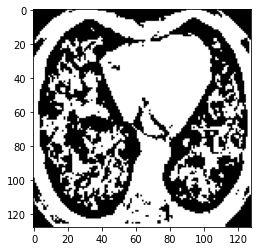

In [ ]:
plt.imshow(segmented_image.squeeze(),cmap='gray')

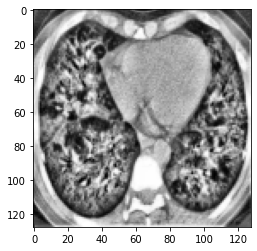

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')

In [ ]:
np.save('/content/drive/MyDrive/Lungs_CT_Covid19_Detect/Segmentation Array/COVID_Seg',COVID_Seg)
np.save('/content/drive/MyDrive/Lungs_CT_Covid19_Detect/Segmentation Array/NonCOVID_Seg',NonCOVID_Seg)

In [ ]:
xdata=COVID_Seg+NonCOVID_Seg
y_data = [1]*len(COVID_Seg) + [0]*len(NonCOVID_Seg)